# **Stock Prices Analysis of MasterCard and Visa 2008-2024**

In [1]:
import pandas as pd # Used for data manipulation and analysis
import numpy as np # Used for numerical operations and handling arrays
import plotly.express as px # Used for creating interactive and concise visualizations
import plotly.graph_objects as go # Used for detailed and customizable interactive visualizations
import matplotlib.pyplot as plt # Used for plotting graphs
import seaborn as sns # Adds static visualizations for correlation heatmaps and distribution comparisons
from scipy.stats import shapiro # Performs a Shapiro-Wilk test for normality on stock returns
from sklearn.preprocessing import PowerTransformer, StandardScaler # Apply transformations to returns to stabilize variance and reduce skewness
from sklearn.model_selection import train_test_split, GridSearchCV # Split the data and build a predictive model for future price predictions
from sklearn.ensemble import RandomForestRegressor # Random Forest algorithm for regression tasks
from sklearn.metrics import mean_squared_error, r2_score # Evaluate the predictive model's performance.

In [2]:
# Load the data
df = pd.read_csv("/content/MVR.csv")

# **Initial dataset exploration**


Provides an overview of the dataset, including the shape, structure, first few rows, and summary statistics.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   object 
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 411.1+ KB


In [4]:
df.head()

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000


In [5]:
df.describe()

,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03
mean,164.535600,166.170139,162.857876,164.563858,160.646182,8.249296e+06,107.988356,108.965956,106.999128,108.003625,104.551613,1.386969e+07
std,138.620480,139.946015,137.248286,138.635551,138.057771,1.140882e+07,82.319225,83.020901,81.600647,82.319975,81.900950,1.469735e+07
min,12.100000,12.736000,11.305000,11.918000,11.024753,6.411000e+05,10.672500,11.047500,10.445000,10.605000,9.496159,1.640900e+06
25%,42.459502,42.865499,42.062000,42.452500,39.624086,2.988750e+06,30.157500,30.582501,29.888750,30.253750,27.724516,6.652450e+06
50%,97.440002,98.089996,96.699997,97.599998,92.752449,4.409000e+06,78.690002,79.349998,78.150002,78.620003,74.387733,9.420400e+06
75%,304.414994,306.979995,300.304993,303.910004,297.765701,8.251500e+06,193.044998,195.095001,190.185005,192.940002,187.882408,1.526840e+07
max,488.529999,490.000000,483.640015,488.640015,487.964142,1.787220e+08,290.000000,290.959991,287.899994,290.369995,289.833618,3.375336e+08


In [6]:
# Checking for null values and duplicates
# Identifies missing data and duplicate rows in the dataset.

print("\nNull values per column:")
print(df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())


Null values per column:
Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0
Low_V          0
Close_V        0
Adj Close_V    0
Volume_V       0
dtype: int64

Number of duplicate rows: 0


In [7]:
# Converting the 'Date' column to datetime format to enable time-series operations for better handling
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Plotting closing prices over time
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close_M'], mode='lines', name='MasterCard', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close_V'], mode='lines', name='Visa', line=dict(color='orange')))
fig.update_layout(title='Closing Prices of MasterCard and Visa (2008-2024)',
                  xaxis_title='Date',
                  yaxis_title='Closing Price',
                  template='plotly_white')
fig.show()

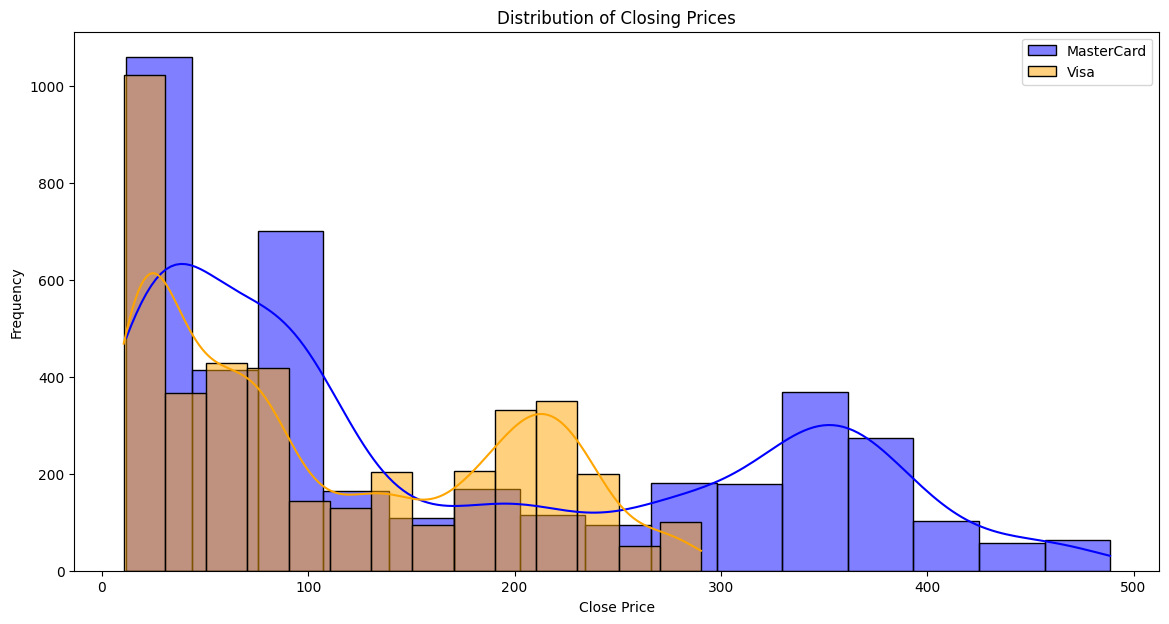

In [9]:
# Plotting the distribution of closing prices
plt.figure(figsize=(14, 7))
sns.histplot(df['Close_M'], kde=True, color='blue', label='MasterCard')
sns.histplot(df['Close_V'], kde=True, color='orange', label='Visa')
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [10]:
# KDE plot for closing prices
fig = px.density_contour(df, x='Close_M', y='Close_V', marginal_x="histogram", marginal_y="histogram",
                         title='KDE Plot: MasterCard vs Visa Closing Prices')
fig.update_layout(xaxis_title='MasterCard Close Price', yaxis_title='Visa Close Price')
fig.show()

In [11]:
# Add volatility metrics (rolling standard deviation)
# Computes 30-day rolling volatility as a measure of price fluctuations.


df['Volatility_M'] = df['Close_M'].rolling(window=30).std()
df['Volatility_V'] = df['Close_V'].rolling(window=30).std()


In [12]:
# Plotting rolling volatility over time
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Volatility_M'], mode='lines', name='MasterCard Volatility', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Volatility_V'], mode='lines', name='Visa Volatility', line=dict(color='orange')))
fig.update_layout(title='Rolling 30-Day Volatility (2008-2024)',
                  xaxis_title='Date',
                  yaxis_title='Volatility',
                  template='plotly_white')
fig.show()

In [13]:
# Correlation heatmap
import plotly.express as px

correlation_matrix = df.corr()

# Use a valid diverging colorscale (e.g., 'balance')
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale=px.colors.diverging.balance,
    title='Correlation Heatmap'
)

fig.show()


In [14]:
# Cap outliers in closing prices using IQR
# Caps outliers using the interquartile range method.
# The interquartile range (IQR) method is a way to calculate the spread of data by identifying the middle 50% of values and finding the difference between the upper and lower quartiles.

for col in ['Close_M', 'Close_V']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)


In [15]:
# Shapiro-Wilk test for normality
# Tests if stock prices follow a normal distribution.

for col in ['Close_M', 'Close_V']:
    stat, p = shapiro(df[col])
    print(f"Shapiro-Wilk Test for {col}: Statistics={stat:.3f}, p={p:.3f}")

Shapiro-Wilk Test for Close_M: Statistics=0.862, p=0.000
Shapiro-Wilk Test for Close_V: Statistics=0.885, p=0.000


In [16]:
# Apply PowerTransformer if data is not normal
# Transforms data to stabilize variance and reduce skewness.

pt = PowerTransformer()
df[['Close_M', 'Close_V']] = pt.fit_transform(df[['Close_M', 'Close_V']])

In [17]:
# Prepare data for regression modeling
X = df[['Open_M', 'High_M', 'Low_M', 'Volume_M', 'Open_V', 'High_V', 'Low_V', 'Volume_V']]
y_M = df['Close_M']
y_V = df['Close_V']
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X, y_M, test_size=0.2, random_state=42)
X_train_V, X_test_V, y_train_V, y_test_V = train_test_split(X, y_V, test_size=0.2, random_state=42)

In [18]:
# Training a RandomForestRegressor with hyperparameter tuning using GridSearchCV.

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_M = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search_V = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

grid_search_M.fit(X_train_M, y_train_M)
grid_search_V.fit(X_train_V, y_train_V)

# Retrieve best estimators
model_M = grid_search_M.best_estimator_
model_V = grid_search_V.best_estimator_

In [19]:
# Best parameters for each model
print("Best parameters for MasterCard:", grid_search_M.best_params_)
print("Best parameters for Visa:", grid_search_V.best_params_)


Best parameters for MasterCard: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Visa: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [20]:
# Predictions and evaluation
# Evaluating the model’s performance using metrics like MSE and R2 Score.

for model, X_test, y_test, label in zip([model_M, model_V], [X_test_M, X_test_V], [y_test_M, y_test_V], ['MasterCard', 'Visa']):
    y_pred = model.predict(X_test)
    print(f"{label} - Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"{label} - R2 Score: {r2_score(y_test, y_pred):.2f}")

MasterCard - Mean Squared Error: 0.00
MasterCard - R2 Score: 1.00
Visa - Mean Squared Error: 0.00
Visa - R2 Score: 1.00


In [21]:
# Interactive plots for actual vs predicted prices
for y_test, y_pred, label in zip([y_test_M, y_test_V], [model_M.predict(X_test_M), model_V.predict(X_test_V)], ['MasterCard', 'Visa']):
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=y_test.values, mode='lines', name=f'Actual {label} Prices', line=dict(color='blue')))
    fig.add_trace(go.Scatter(y=y_pred, mode='lines', name=f'Predicted {label} Prices', line=dict(color='orange')))
    fig.update_layout(title=f'Actual vs Predicted {label} Prices',
                      xaxis_title='Samples',
                      yaxis_title='Price',
                      template='plotly_white')
    fig.show()

The plots compare the actual stock prices (blue line) with the predicted prices (orange line) for MasterCard and Visa. The near-perfect overlap between the two lines indicates that the Random Forest model has captured the underlying patterns in the data very well, achieving high accuracy. This suggests the model has learned the relationship between the input features and target variable effectively.

However, the tight fit could also point to potential overfitting, where the model performs exceptionally well on the training data but might not generalize to unseen data. This observation underscores the importance of validating the model on an entirely separate dataset to ensure its robustness and reliability. If the model's performance remains consistent across validation sets, it could serve as a reliable tool for short-term price forecasting of these stocks.